# Лабораторная работа №1: Префиксные суммы

Лабораторная работа состоит из 10 задач. Для каждой задачи вы должны дать: \
1) код, где первый комментарий - асимптотическая сложность алгоритма (по времени и по памяти!) \

2) скрин с окнутой задачей из тестирующей системы\

3) ВАШЕ (не гпт) описание работы (так называемая, интуиция / идея решения).

Задача засчитывается, если три пункта выполнены честно.

Если вдруг, обнаружится плагиат / гпт решения - аннулируется задача без возможности апелляции.

**DEADLine - 27.02.2025**

## Инструкция по сдаче ЛР.



0. Просмотр лекции обязателен. Не потому что без этого невозможно выполнить домашнее задание, а потому что с этим выполнение домашнего задания станет комфортным, приятным и быстрым. Вы потратите намного меньше времени для изучения материала и понимания того, что от Вас хотят, нежели сразу приступите к выполнению домашнего задания без просмотра лекции.

1. Скопируйте к себе колаб-ноутбук.

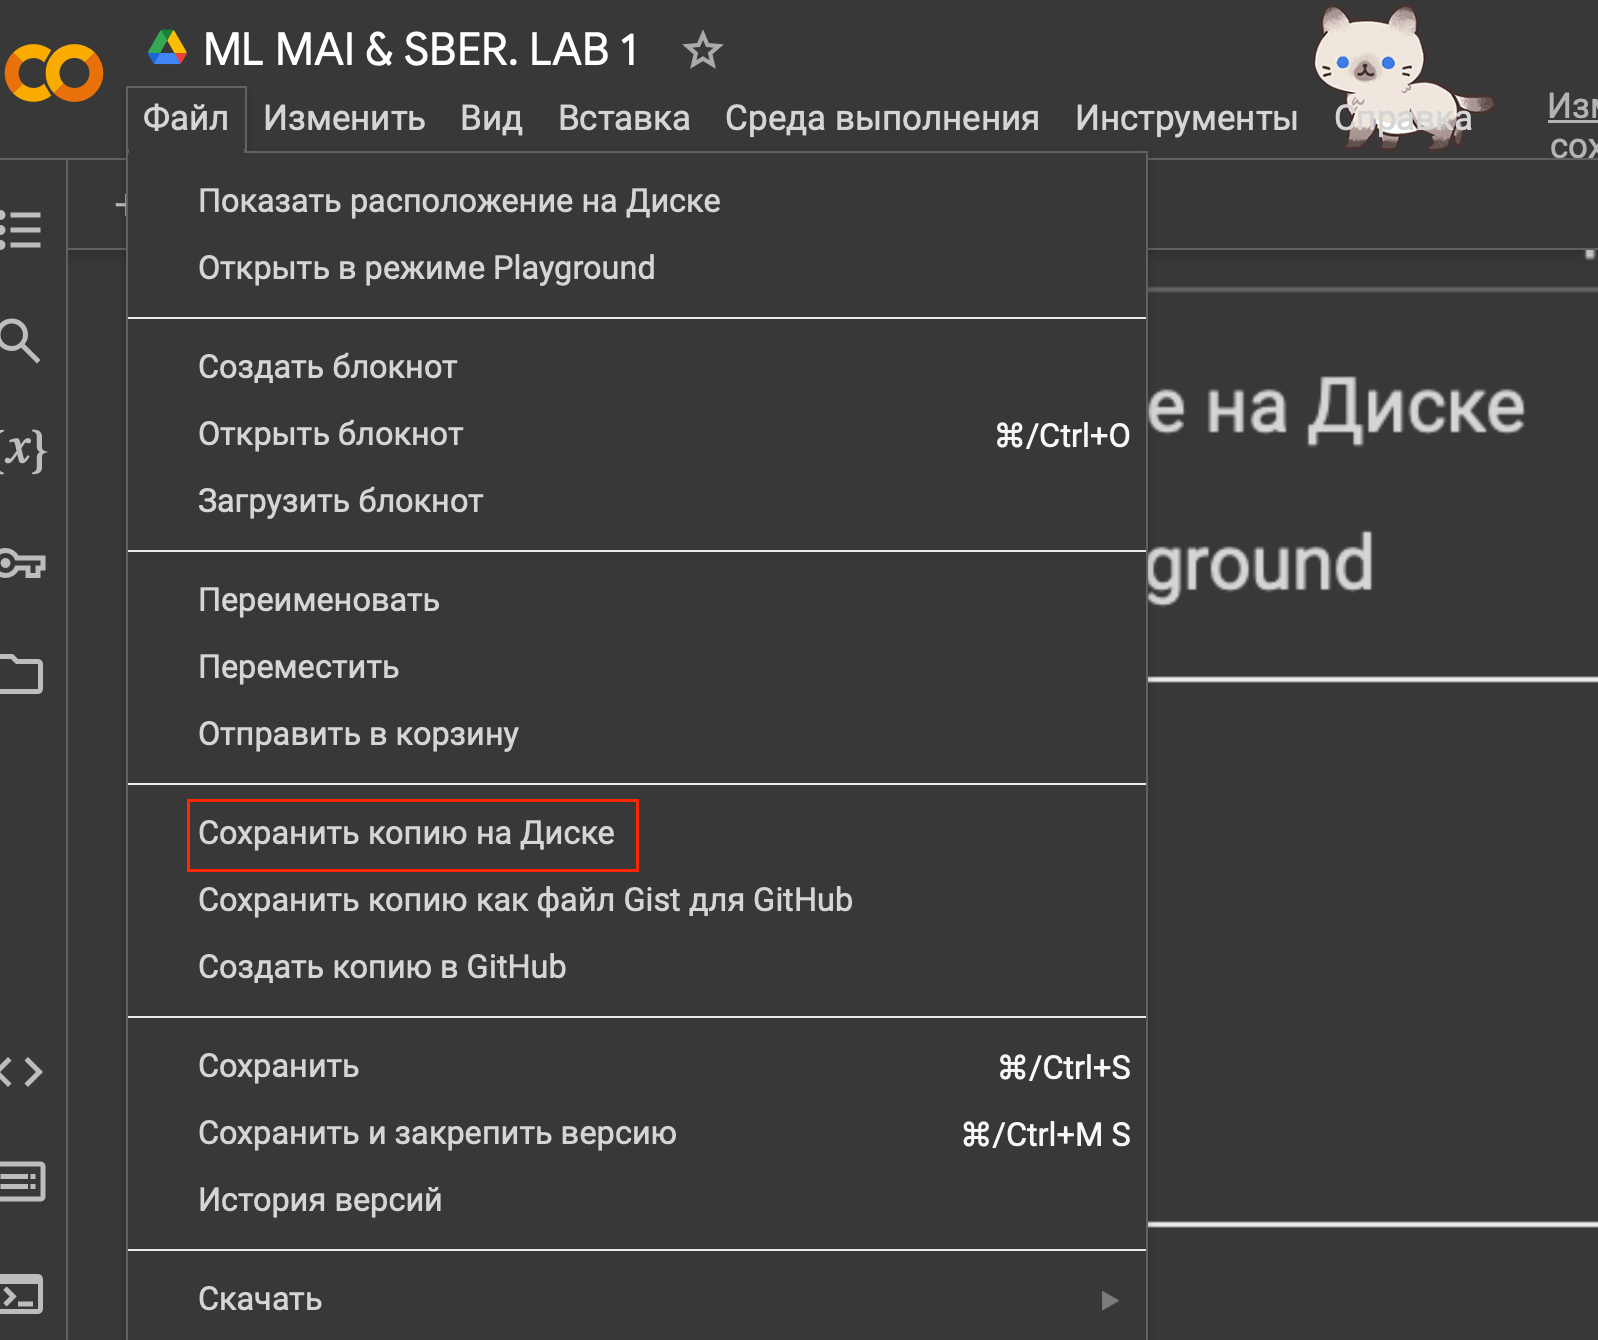

[Текст ссылки](https:// [Текст ссылки](https://))2. у Вас откроется файл в новой вкладке с названием "Копия...". После описания задания вы пишите решение этого задания.

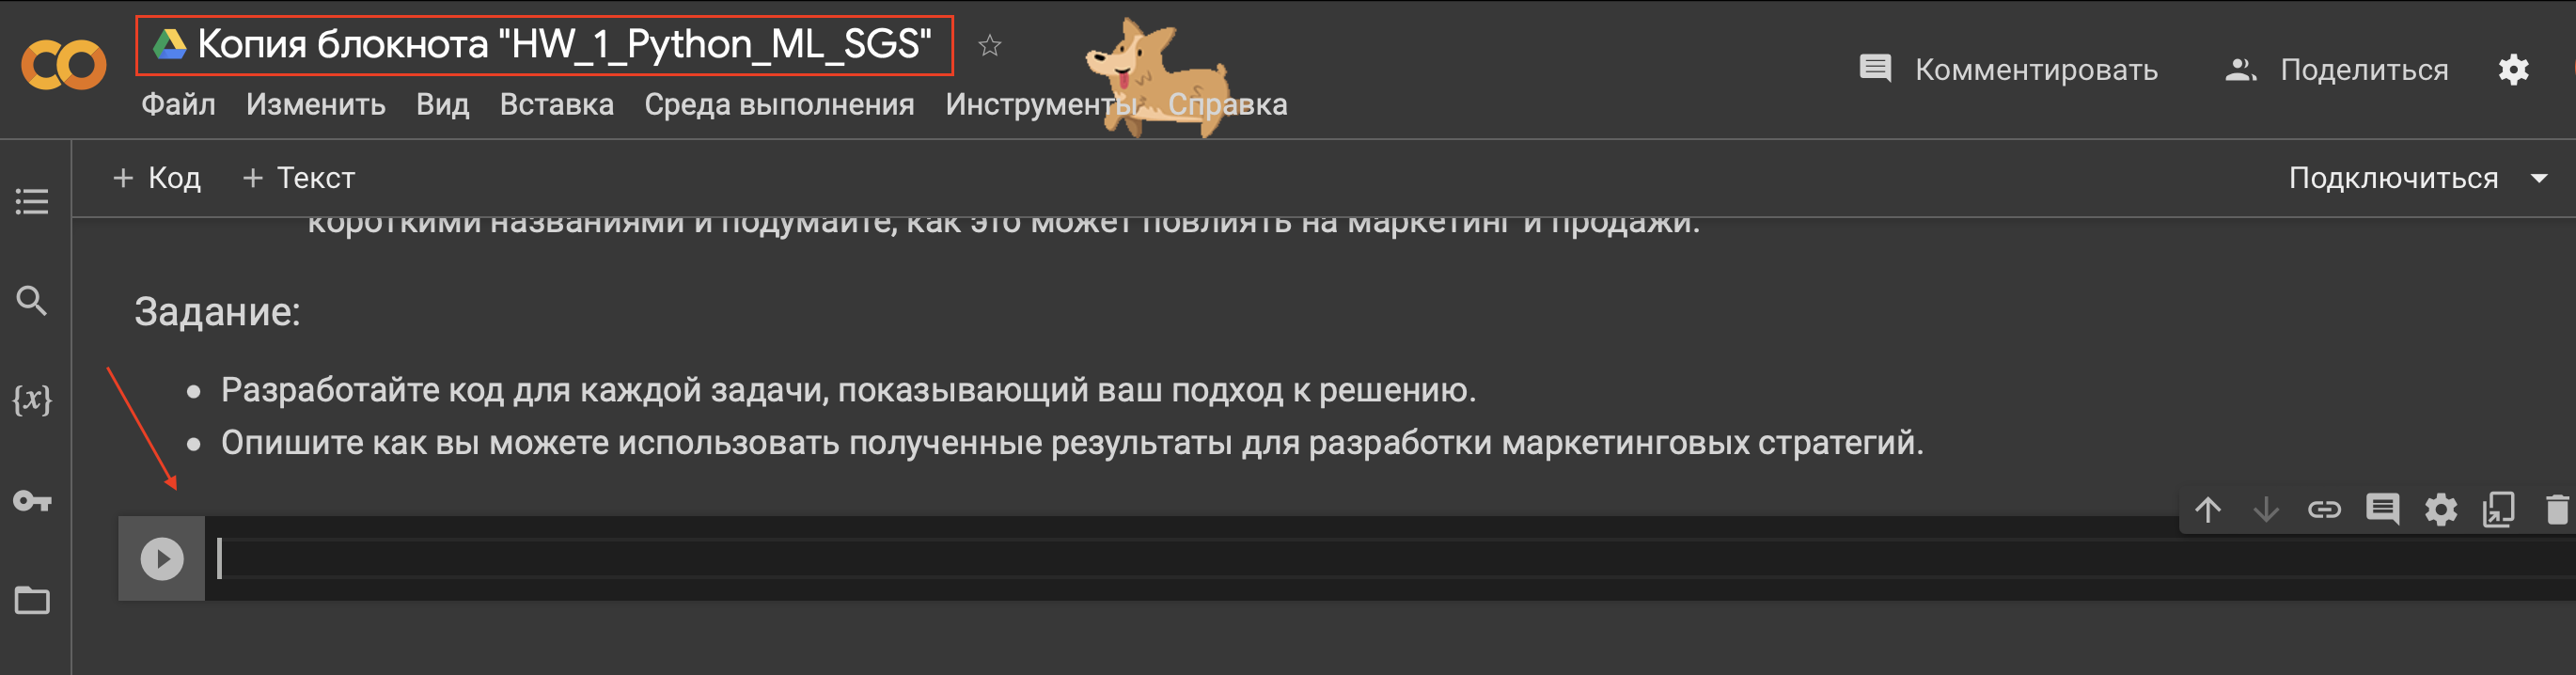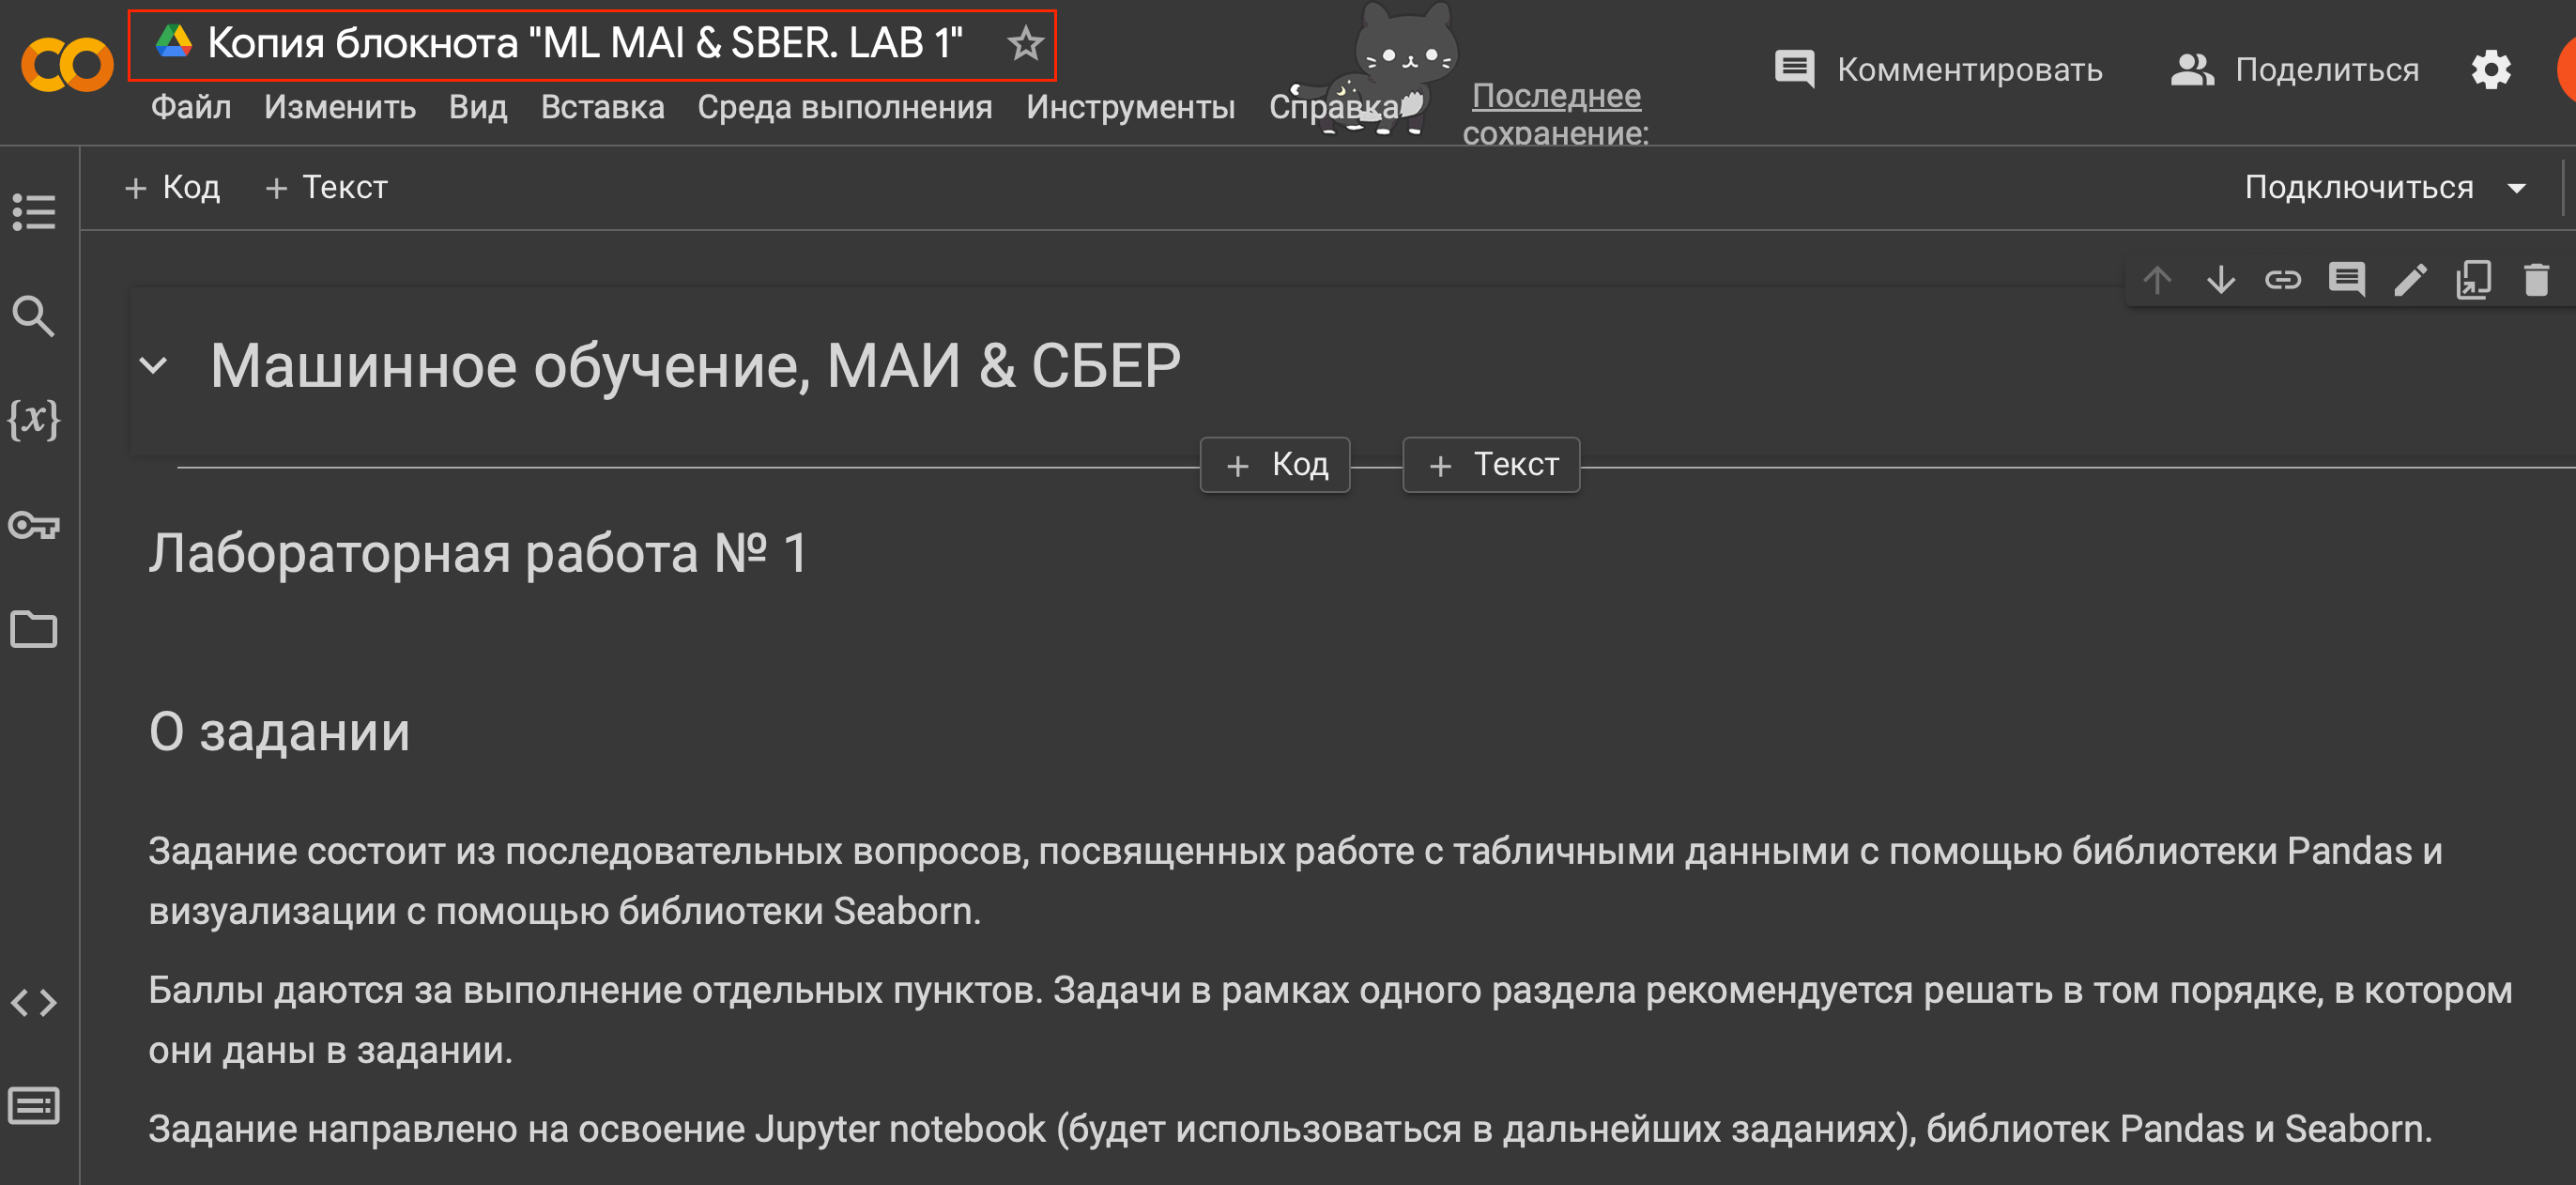

3. После выполнения домашнего задания нажмите кнопку "поделиться" и перейдите в режим доступно всем по ссылке

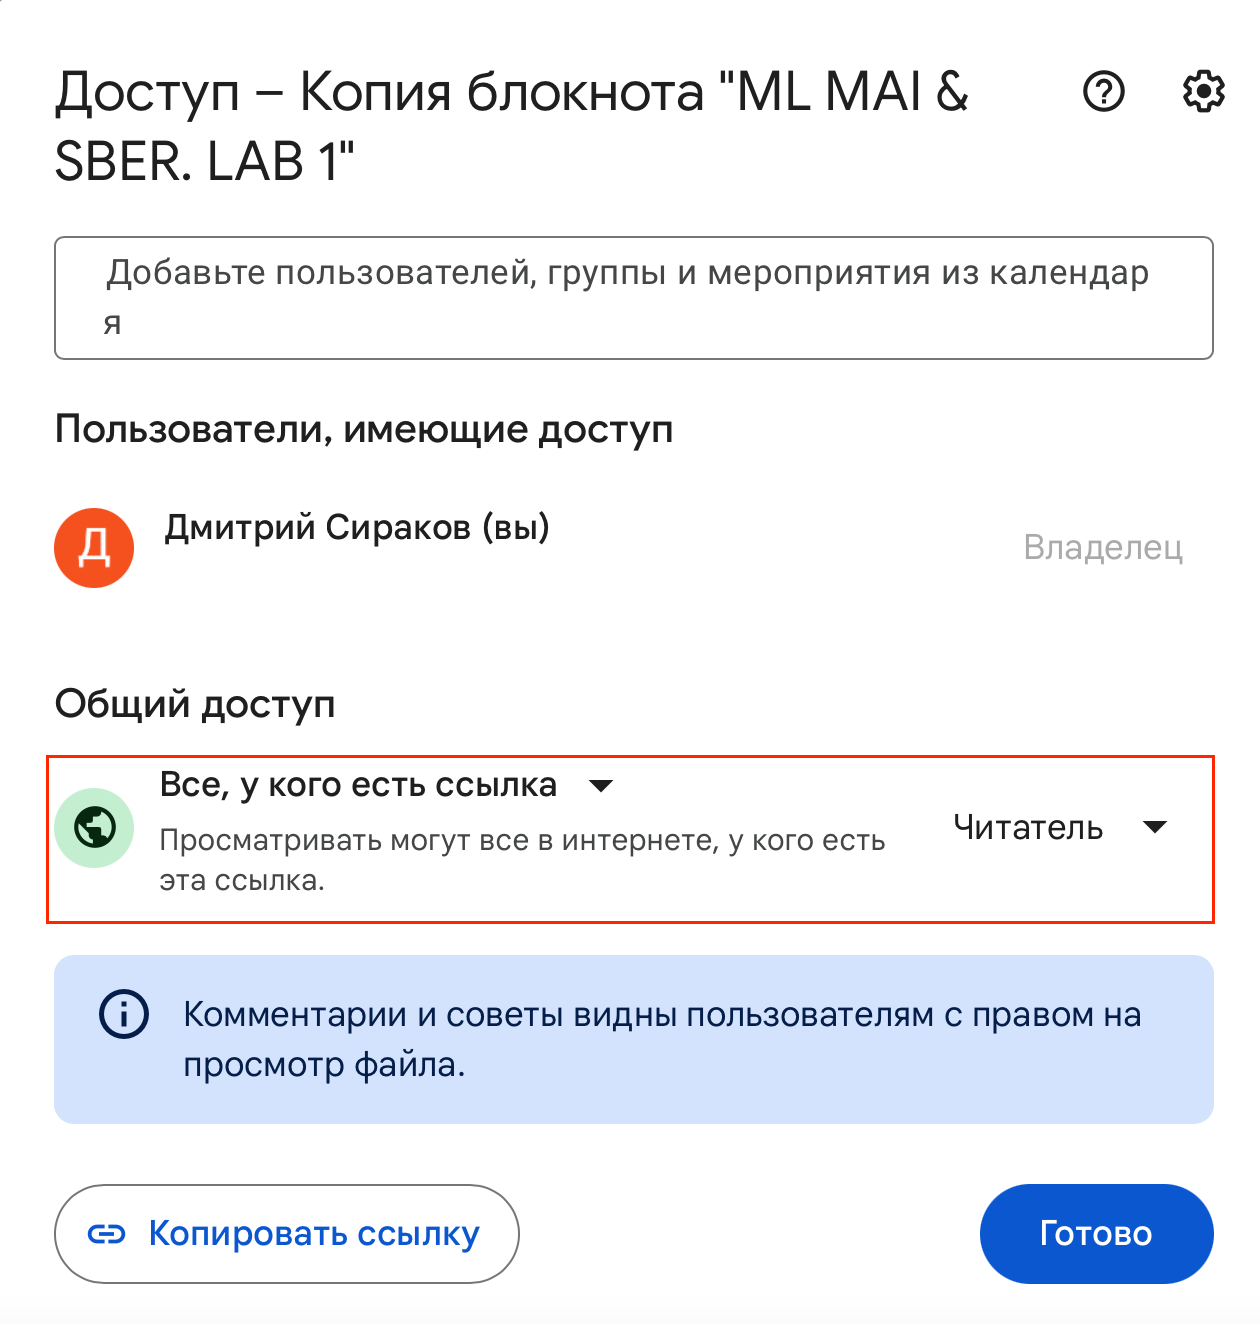

4. Загрузите эту ссылку в lms.mai.ru по курсу "Алгоритмы на Python" в качестве ссылки в раздел "Префиксные суммы (ЛР) [12.02]"


# Приступим!

## 1. Задача - 1442. Count Triplets That Can Form Two Arrays of Equal XOR ([ссылка](https://leetcode.com/problems/count-triplets-that-can-form-two-arrays-of-equal-xor/description/)) [0.6 балла]

Перевод задачи:

Дан массив целых чисел `arr`.

Необходимо выбрать три индекса `i`, `j` и `k`, удовлетворяющие условиям:

- $ 0 \leq i < j \leq k < arr.length $

Определим два значения `a` и `b` следующим образом:

- $ a = arr[i] \oplus arr[i + 1] \oplus ... \oplus arr[j - 1] $
- $ b = arr[j] \oplus arr[j + 1] \oplus ... \oplus arr[k] $

где `⊕` обозначает побитовую операцию XOR.

Необходимо найти количество таких троек \((i, j, k)\), при которых \( a == b \).

---

## Примеры

### Пример 1:
**Вход:**
```python
arr = [2,3,1,6,7]
```
**Выход:**
```
4
```
**Объяснение:**
Возможные тройки (i, j, k):
- (0,1,2)
- (0,2,2)
- (2,3,4)
- (2,4,4)

### Пример 2:
**Вход:**
```python
arr = [1,1,1,1,1]
```
**Выход:**
```
10
```

---

## Ограничения:
- $ 1 \leq arr.length \leq 300 $
- $ 1 \leq arr[i] \leq 10^8 $

In [ ]:
from collections import defaultdict
from typing import List

class Solution:
    def countTriplets(self, arr: List[int]) -> int:
        """
        Description:
            Подсчитывает количество троек индексов (i, j, k) таких, что:
            - i < j <= k
            - XOR всех элементов от arr[i] до arr[j-1] равен XOR всех элементов от arr[j] до arr[k]

        Args:
            arr: Список целых чисел

        Returns:
            Количество троек индексов, удовлетворяющих условиям

        Examples:
            >>> solution = Solution()
            >>> solution.countTriplets([2, 3, 1, 6, 7])
            4
        """
        n = len(arr)
        prefix_xor = [0] * (n + 1)

        print("Вычисление префиксного XOR:")
        for i in range(n):
            prefix_xor[i + 1] = prefix_xor[i] ^ arr[i]
            print(f"  Элемент {i}: XOR = {prefix_xor[i]} ^ {arr[i]} = {prefix_xor[i + 1]}")

        prefix_map = defaultdict(list)
        prefix_map[0].append(0)
        ans = 0

        print("\nПоиск троек индексов:")
        for r in range(1, n + 1):
            current_xor = prefix_xor[r]
            print(f"\nТекущий индекс r = {r}, XOR = {current_xor}")
            if current_xor in prefix_map:
                print(f"  Найден совпадающий XOR в prefix_map:")
                for i in prefix_map[current_xor]:
                    ans += (r - 1 - i)
                    print(f"    Тройка: i={i}, j={r-1}, k={r-1}. Текущее количество троек: {ans}")
            prefix_map[current_xor].append(r)
            print(f"  Обновленный prefix_map:")
            for key, values in prefix_map.items():
                print(f"    XOR={key}: индексы {values}")

        return ans

# Входные данные
arr = [2, 3, 1, 6, 7]

# Создание экземпляра класса
solution = Solution()

# Вызов метода и получение результата
result = solution.countTriplets(arr)

# Вывод результата
print(f"\nИтоговое количество троек: {result}")

Вычисление префиксного XOR:
  Элемент 0: XOR = 0 ^ 2 = 2
  Элемент 1: XOR = 2 ^ 3 = 1
  Элемент 2: XOR = 1 ^ 1 = 0
  Элемент 3: XOR = 0 ^ 6 = 6
  Элемент 4: XOR = 6 ^ 7 = 1

Поиск троек индексов:

Текущий индекс r = 1, XOR = 2
  Обновленный prefix_map:
    XOR=0: индексы [0]
    XOR=2: индексы [1]

Текущий индекс r = 2, XOR = 1
  Обновленный prefix_map:
    XOR=0: индексы [0]
    XOR=2: индексы [1]
    XOR=1: индексы [2]

Текущий индекс r = 3, XOR = 0
  Найден совпадающий XOR в prefix_map:
    Тройка: i=0, j=2, k=2. Текущее количество троек: 2
  Обновленный prefix_map:
    XOR=0: индексы [0, 3]
    XOR=2: индексы [1]
    XOR=1: индексы [2]

Текущий индекс r = 4, XOR = 6
  Обновленный prefix_map:
    XOR=0: индексы [0, 3]
    XOR=2: индексы [1]
    XOR=1: индексы [2]
    XOR=6: индексы [4]

Текущий индекс r = 5, XOR = 1
  Найден совпадающий XOR в prefix_map:
    Тройка: i=2, j=4, k=4. Текущее количество троек: 4
  Обновленный prefix_map:
    XOR=0: индексы [0, 3]
    XOR=2: индексы [1]


### ВАША интуиция

Эта задача решается с использованием побитовой операции XOR и префиксных сумм. Давайте разберемся, как это работает. Но сначало лучше разобрать базу, эвристика тут не поможет.

<details>
    <summary><em><strong>БАЗА</strong></em></summary>

### **Название фрагмента: Префиксные суммы и их применение. Префиксный XOR.**

## **Префиксные суммы**

Префиксные суммы — это техника, используемая для быстрого вычисления суммы элементов массива на заданном отрезке. Эта концепция особенно полезна, когда необходимо обрабатывать множество запросов на сумму, так как она позволяет значительно сократить время выполнения по сравнению с наивным подходом.

### Основная идея префиксных сумм

Префиксная сумма для массива — это массив, где каждый элемент представляет собой сумму всех предыдущих элементов исходного массива. Например, если у нас есть массив:

$$
A = [6, 7, 4, 9, 1]
$$

то префиксный массив $P$ будет выглядеть следующим образом:

$$
P[i] = A[0] + A[1] + ... + A[i]
$$

Для нашего массива $A$ префиксные суммы будут:

- $P[0] = 6$
- $P[1] = 6 + 7 = 13$
- $P[2] = 6 + 7 + 4 = 17$
- $P[3] = 6 + 7 + 4 + 9 = 26$
- $P[4] = 6 + 7 + 4 + 9 + 1 = 27$

Таким образом, префиксный массив будет:

$$
P = [6, 13, 17, 26, 27]
$$

### Как использовать префиксные суммы для вычисления суммы на отрезке

Чтобы найти сумму элементов массива от индекса $L$ до $R$, можно использовать префиксные суммы следующим образом:

$$
\text{Сумма}(L, R) = P[R] - P[L-1]
$$

Это позволяет вычислить сумму за $O(1)$, что значительно быстрее, чем наивный подход, который требует $O(n)$.

## Математическая формализация префиксных сумм

Рассмотрим математическую формализацию этой концепции для более глубокого понимания и точного описания.

**1. Определение исходного массива и префиксных сумм**

Пусть задан исходный массив $A$, состоящий из $n$ элементов, проиндексированных от 0 до $n-1$. Обозначим элементы массива как $a_0, a_1, a_2, ..., a_{n-1}$.

$$
A = [a_0, a_1, a_2, ..., a_{n-1}]
$$

Префиксная сумма массива $A$ — это новый массив $P$ той же размерности $n$, где каждый элемент $p_i$ является суммой всех элементов массива $A$ от начала (индекса 0) до индекса $i$ включительно.  Элементы массива $P$ обозначаются как $p_0, p_1, p_2, ..., p_{n-1}$.

$$
P = [p_0, p_1, p_2, ..., p_{n-1}]
$$

**2. Математическое определение префиксной суммы**

Формально, $i$-й элемент префиксного массива $P$ определяется как сумма первых $i+1$ элементов исходного массива $A$:

$$
p_i = \sum_{j=0}^{i} a_j
$$

где:
- $p_i$ — $i$-й элемент префиксного массива $P$.
- $\sum$ — символ суммы.
- $a_j$ — $j$-й элемент исходного массива $A$.
- $j$ — индекс суммирования, изменяющийся от 0 до $i$.

**Пример:**

Для массива $A = [6, 7, 4, 9, 1]$ префиксные суммы вычисляются следующим образом:

- $p_0 = a_0 = 6$
- $p_1 = a_0 + a_1 = 6 + 7 = 13$
- $p_2 = a_0 + a_1 + a_2 = 6 + 7 + 4 = 17$
- $p_3 = a_0 + a_1 + a_2 + a_3 = 6 + 7 + 4 + 9 = 26$
- $p_4 = a_0 + a_1 + a_2 + a_3 + a_4 = 6 + 7 + 4 + 9 + 1 = 27$

Таким образом, $P = [6, 13, 17, 26, 27]$.

**3. Итеративный метод вычисления префиксных сумм**

На практике, префиксные суммы удобно вычислять итеративно, используя уже вычисленное значение предыдущей префиксной суммы.

- **Базовый случай:** Первый элемент префиксного массива $p_0$ равен первому элементу исходного массива $a_0$:
    $$
    p_0 = a_0
    $$

- **Рекуррентное соотношение:** Для всех последующих элементов префиксного массива (при $i > 0$), $i$-й элемент $p_i$ вычисляется как сумма предыдущего элемента префиксного массива $p_{i-1}$ и текущего элемента исходного массива $a_i$:
    $$
    p_i = p_{i-1} + a_i, \quad \text{для } i > 0
    $$

**4. Вычисление суммы на отрезке [L, R] с использованием префиксных сумм**

Основное преимущество префиксных сумм заключается в возможности быстрого вычисления суммы элементов исходного массива $A$ на произвольном отрезке индексов от $L$ до $R$ включительно (где $0 \le L \le R \le n-1$).

Сумма элементов на отрезке $[L, R]$ обозначается как $\text{Сумма}(L, R)$ и вычисляется по формуле:

$$
\text{Сумма}(L, R) = P[R] - P[L-1]
$$

Для корректной работы формулы при $L = 0$, необходимо ввести понятие "нулевой" префиксной суммы, полагая, что $P[-1] = 0$. В этом случае, если отрезок начинается с индекса 0, формула упрощается до:

$$
\text{Сумма}(0, R) = P[R] - P[-1] = P[R] - 0 = P[R]
$$

**5. Пояснение формулы для суммы на отрезке**

Чтобы понять, почему формула $\text{Сумма}(L, R) = P[R] - P[L-1]$ работает, развернем определения префиксных сумм:

- $P[R] = a_0 + a_1 + ... + a_{L-1} + a_L + ... + a_R$ (сумма элементов от $a_0$ до $a_R$)
- $P[L-1] = a_0 + a_1 + ... + a_{L-1}$ (сумма элементов от $a_0$ до $a_{L-1}$)

Вычитая $P[L-1]$ из $P[R]$, мы получаем:

$$
P[R] - P[L-1] = (a_0 + a_1 + ... + a_{L-1} + a_L + ... + a_R) - (a_0 + a_1 + ... + a_{L-1})
$$

После сокращения общих слагаемых, остается:

$$
P[R] - P[L-1] = a_L + a_{L+1} + ... + a_R = \sum_{j=L}^{R} a_j
$$

Что и является суммой элементов массива $A$ на отрезке от индекса $L$ до индекса $R$.

**6. Временная сложность**

- **Вычисление префиксных сумм:** Требует однократного прохода по массиву, что занимает $O(n)$ времени, где $n$ — размер массива.
- **Вычисление суммы на отрезке:**  Используя префиксные суммы, сумма на любом отрезке $[L, R]$ вычисляется за константное время $O(1)$, так как требуется всего одно вычитание.

## **Префиксный XOR для массива**

По аналогии с префиксными суммами, префиксный XOR — это техника, используемая для быстрого вычисления XOR суммы элементов массива на заданном отрезке.  Эта концепция также крайне полезна при обработке множества запросов на XOR сумму, обеспечивая значительное ускорение по сравнению с наивным подходом.

### Основная идея префиксного XOR

Префиксный XOR для массива — это массив, где каждый элемент представляет собой XOR сумму всех предыдущих элементов исходного массива.  Если у нас есть массив:

$$
A = [6, 7, 4, 9, 1]
$$

то префиксный XOR массив $X$ будет выглядеть следующим образом:

$$
X[i] = A[0] \oplus A[1] \oplus ... \oplus A[i]
$$

Для нашего массива $A$ префиксные XOR значения будут:

- $X[0] = 6$
- $X[1] = 6 \oplus 7 = 1$
- $X[2] = 6 \oplus 7 \oplus 4 = 5$
- $X[3] = 6 \oplus 7 \oplus 4 \oplus 9 = 12$
- $X[4] = 6 \oplus 7 \oplus 4 \oplus 9 \oplus 1 = 13$

<details>
    <summary><em><strong>Давайте разберем это подробнее</strong></em></summary>

**Побитовая операция XOR (исключающее ИЛИ)**

Операция XOR (обозначается символом $\oplus$) сравнивает соответствующие биты двух чисел.  Результат операции XOR для двух битов следующий:

- 0 $\oplus$ 0 = 0
- 0 $\oplus$ 1 = 1
- 1 $\oplus$ 0 = 1
- 1 $\oplus$ 1 = 0

Другими словами, результат XOR равен 1, только если биты отличаются, и 0, если биты одинаковы.

**Рассмотрим пример $6 \oplus 7$:**

1. **Представим числа 6 и 7 в двоичной системе:**
   - Число 6 в двоичной системе:  `0110` (представим в 4 битах для наглядности, хотя в компьютере числа хранятся в большем количестве битов)
   - Число 7 в двоичной системе:  `0111` (также в 4 битах)

2. **Выполним операцию XOR побитово, начиная справа (с младших битов):**

   ```
     0110  (число 6)
   ⊕ 0111  (число 7)
   ------
   ```

   - **Бит 0 (самый правый):**  0 $\oplus$ 1 = 1
   - **Бит 1:**           1 $\oplus$ 1 = 0
   - **Бит 2:**           1 $\oplus$ 1 = 0
   - **Бит 3 (самый левый):** 0 $\oplus$ 0 = 0

   Записываем результаты побитовых операций:

   ```
     0110  (число 6)
   ⊕ 0111  (число 7)
   ------
     0001
   ```

3. **Переведем двоичный результат `0001` обратно в десятичную систему:**
   - `0001` в двоичной системе равен 1 в десятичной системе.

**Таким образом, $6 \oplus 7 = 1$.**

В примере префиксного XOR массива:

- $X[0] = A[0] = 6$ (просто первый элемент массива)
- $X[1] = A[0] \oplus A[1] = 6 \oplus 7 = 1$ (XOR сумма первого и второго элементов массива)

Таким образом, префиксный XOR массив будет:

$$
X = [6, 1, 5, 12, 13]
$$

### Как использовать префиксный XOR для вычисления XOR суммы на отрезке

Чтобы найти XOR сумму элементов массива от индекса $L$ до $R$, можно использовать префиксные XOR значения следующим образом:

$$
\text{XOR-Сумма}(L, R) = X[R] \oplus X[L-1]
$$

Это позволяет вычислить XOR сумму за $O(1)$, что значительно быстрее, чем наивный подход, требующий $O(n)$.

## Математическая формализация префиксного XOR

Рассмотрим математическую формализацию концепции префиксного XOR для более точного и глубокого понимания.

**1. Определение исходного массива и префиксных XOR значений**

Пусть задан исходный массив $A$, состоящий из $n$ элементов, проиндексированных от 0 до $n-1$. Обозначим элементы массива как $a_0, a_1, a_2, ..., a_{n-1}$.

$$
A = [a_0, a_1, a_2, ..., a_{n-1}]
$$

Префиксный XOR массив $X$ массива $A$ — это новый массив той же размерности $n$, где каждый элемент $x_i$ является XOR суммой всех элементов массива $A$ от начала (индекса 0) до индекса $i$ включительно. Элементы массива $X$ обозначаются как $x_0, x_1, x_2, ..., x_{n-1}$.

$$
X = [x_0, x_1, x_2, ..., x_{n-1}]
$$

**2. Математическое определение префиксного XOR**

Формально, $i$-й элемент префиксного XOR массива $X$ определяется как XOR сумма первых $i+1$ элементов исходного массива $A$:

$$
x_i = \bigoplus_{j=0}^{i} a_j
$$

где:
- $x_i$ — $i$-й элемент префиксного XOR массива $X$.
- $\bigoplus$ — символ операции побитового XOR.
- $a_j$ — $j$-й элемент исходного массива $A$.
- $j$ — индекс, изменяющийся от 0 до $i$.

**Пример:**

Для массива $A = [6, 7, 4, 9, 1]$ префиксные XOR значения вычисляются следующим образом:

- $x_0 = a_0 = 6$
- $x_1 = a_0 \oplus a_1 = 6 \oplus 7 = 1$
- $x_2 = a_0 \oplus a_1 \oplus a_2 = 6 \oplus 7 \oplus 4 = 5$
- $x_3 = a_0 \oplus a_1 \oplus a_2 \oplus a_3 = 6 \oplus 7 \oplus 4 \oplus 9 = 12$
- $x_4 = a_0 \oplus a_1 \oplus a_2 \oplus a_3 \oplus a_4 = 6 \oplus 7 \oplus 4 \oplus 9 \oplus 1 = 13$

Таким образом, $X = [6, 1, 5, 12, 13]$.

**3. Итеративный метод вычисления префиксных XOR значений**

Аналогично префиксным суммам, префиксные XOR значения удобно вычислять итеративно, используя уже вычисленное предыдущее значение.

- **Базовый случай:** Первый элемент префиксного XOR массива $x_0$ равен первому элементу исходного массива $a_0$:
    $$
    x_0 = a_0
    $$

- **Рекуррентное соотношение:** Для всех последующих элементов префиксного XOR массива (при $i > 0$), $i$-й элемент $x_i$ вычисляется как XOR сумма предыдущего элемента префиксного XOR массива $x_{i-1}$ и текущего элемента исходного массива $a_i$:
    $$
    x_i = x_{i-1} \oplus a_i, \quad \text{для } i > 0
    $$

**4. Вычисление XOR суммы на отрезке [L, R] с использованием префиксных XOR значений**

Основное преимущество префиксных XOR значений заключается в возможности быстрого вычисления XOR суммы элементов исходного массива $A$ на произвольном отрезке индексов от $L$ до $R$ включительно (где $0 \le L \le R \le n-1$).

XOR сумма элементов на отрезке $[L, R]$ обозначается как $\text{XOR-Сумма}(L, R)$ и вычисляется по формуле:

$$
\text{XOR-Сумма}(L, R) = X[R] \oplus X[L-1]
$$

Для корректной работы формулы при $L = 0$, необходимо ввести понятие "нулевого" префиксного XOR значения, полагая, что $X[-1] = 0$. В этом случае, если отрезок начинается с индекса 0, формула упрощается до:

$$
\text{XOR-Сумма}(0, R) = X[R] \oplus X[-1] = X[R] \oplus 0 = X[R]
$$

**5. Пояснение формулы для XOR суммы на отрезке**

Чтобы понять, почему формула $\text{XOR-Сумма}(L, R) = X[R] \oplus X[L-1]$ работает, развернем определения префиксных XOR значений:

- $X[R] = a_0 \oplus a_1 \oplus ... \oplus a_{L-1} \oplus a_L \oplus ... \oplus a_R$ (XOR сумма элементов от $a_0$ до $a_R$)
- $X[L-1] = a_0 \oplus a_1 \oplus ... \oplus a_{L-1}$ (XOR сумма элементов от $a_0$ до $a_{L-1}$)

Вычисляя XOR сумму $X[R]$ и $X[L-1]$, мы используем свойство XOR, что $x \oplus x = 0$.

$$
X[R] \oplus X[L-1] = (a_0 \oplus a_1 \oplus ... \oplus a_{L-1} \oplus a_L \oplus ... \oplus a_R) \oplus (a_0 \oplus a_1 \oplus ... \oplus a_{L-1})
$$

В силу коммутативности и ассоциативности операции XOR, а также свойства $x \oplus x = 0$, все элементы от $a_0$ до $a_{L-1}$ взаимно уничтожаются:

$$
X[R] \oplus X[L-1] = (a_0 \oplus a_0) \oplus (a_1 \oplus a_1) \oplus ... \oplus (a_{L-1} \oplus a_{L-1}) \oplus a_L \oplus ... \oplus a_R = 0 \oplus 0 \oplus ... \oplus 0 \oplus a_L \oplus ... \oplus a_R
$$

Остается:

$$
X[R] \oplus X[L-1] = a_L \oplus a_{L+1} \oplus ... \oplus a_R = \bigoplus_{j=L}^{R} a_j
$$

Что и является XOR суммой элементов массива $A$ на отрезке от индекса $L$ до индекса $R$.

**6. Временная сложность**

- **Вычисление префиксных XOR значений:** Требует однократного прохода по массиву, что занимает $O(n)$ времени, где $n$ — размер массива.
- **Вычисление XOR суммы на отрезке:**  Используя префиксные XOR значения, XOR сумма на любом отрезке $[L, R]$ вычисляется за константное время $O(1)$, так как требуется всего одна операция XOR.

Таким образом, префиксный XOR является мощным инструментом для эффективной обработки запросов на XOR сумму на отрезках массива, аналогично префиксным суммам для обычных сумм.
</details>

</details>

### Основная идея

1. **Префиксный XOR**:
   - Префиксный XOR для массива — это массив, где каждый элемент представляет собой XOR всех предыдущих элементов. Например, для массива `arr = [2, 3, 1, 6, 7]`, префиксный XOR будет:
     - `prefix_xor[0] = 0`
     - `prefix_xor[1] = arr[0] = 2`
     - `prefix_xor[2] = arr[0] ^ arr[1] = 2 ^ 3 = 1`
     - `prefix_xor[3] = arr[0] ^ arr[1] ^ arr[2] = 2 ^ 3 ^ 1 = 0`
     - `prefix_xor[4] = arr[0] ^ arr[1] ^ arr[2] ^ arr[3] = 2 ^ 3 ^ 1 ^ 6 = 4`
     - `prefix_xor[5] = arr[0] ^ arr[1] ^ arr[2] ^ arr[3] ^ arr[4] = 2 ^ 3 ^ 1 ^ 6 ^ 7 = 3`

2. **Свойства XOR**:
   - XOR обладает свойством, что `a ^ a = 0` и `a ^ 0 = a`. Это позволяет нам использовать XOR для нахождения пар элементов, которые в сумме дают нужное значение.

3. **Поиск троек**:
   - Для каждого индекса `r` (от 1 до `n`), мы вычисляем текущий префиксный XOR `current_xor = prefix_xor[r]`.
   - Если `current_xor` уже встречался ранее (хранится в `prefix_map`), это означает, что существует индекс `i`, для которого `prefix_xor[i] = current_xor`.
   - Для каждого такого `i`, все индексы `j` в диапазоне от `i+1` до `r-1` будут удовлетворять условию `a == b`, где `a = prefix_xor[j] ^ prefix_xor[i]` и `b = prefix_xor[r] ^ prefix_xor[j]`.

### Пример

Рассмотрим пример `arr = [2, 3, 1, 6, 7]`:

1. **Вычисление префиксного XOR**:
   - `prefix_xor = [0, 2, 1, 0, 4, 3]`

2. **Поиск троек**:
   - Для `r = 1`, `current_xor = 2`. В `prefix_map` есть `0`, но нет `2`.
   - Для `r = 2`, `current_xor = 1`. В `prefix_map` есть `0`, но нет `1`.
   - Для `r = 3`, `current_xor = 0`. В `prefix_map` есть `0`. Это означает, что для `i = 0`, все `j` от `1` до `2` удовлетворяют условию. Добавляем тройки `(0, 1, 2)` и `(0, 2, 2)`.
   - Для `r = 4`, `current_xor = 4`. В `prefix_map` нет `4`.
   - Для `r = 5`, `current_xor = 3`. В `prefix_map` нет `3`.

Таким образом, мы находим все тройки `(i, j, k)`, удовлетворяющие условию `a == b`, используя префиксный XOR и свойства XOR.

### ВАШ скрин ОКнутой задачи

![1442](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/01_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 1588. Sum of All Odd Length Subarrays ([ссылка](https://leetcode.com/problems/sum-of-all-odd-length-subarrays/description/)) [0.6 балла]

Перевод задачи:
## Условие задачи

Дан массив положительных целых чисел `arr`. Необходимо вернуть сумму всех возможных подмассивов нечетной длины.

**Подмассив** — это непрерывная подпоследовательность массива.

---

## Примеры

### Пример 1:
**Вход:**
```python
arr = [1,4,2,5,3]
```
**Выход:**
```
58
```
**Объяснение:**
Возможные подмассивы нечетной длины и их суммы:

- `[1] = 1`
- `[4] = 4`
- `[2] = 2`
- `[5] = 5`
- `[3] = 3`
- `[1,4,2] = 7`
- `[4,2,5] = 11`
- `[2,5,3] = 10`
- `[1,4,2,5,3] = 15`

Суммируем:  
`1 + 4 + 2 + 5 + 3 + 7 + 11 + 10 + 15 = 58`

---

### Пример 2:
**Вход:**
```python
arr = [1,2]
```
**Выход:**
```
3
```
**Объяснение:**  
Возможные подмассивы нечетной длины:
- `[1] = 1`
- `[2] = 2`

Сумма: `1 + 2 = 3`

---

### Пример 3:
**Вход:**
```python
arr = [10,11,12]
```
**Выход:**
```
66
```
**Объяснение:**
Возможные подмассивы нечетной длины:
- `[10] = 10`
- `[11] = 11`
- `[12] = 12`
- `[10,11,12] = 33`

Сумма: `10 + 11 + 12 + 33 = 66`

---

## Ограничения:
- $ 1 \leq arr.length \leq 100 $
- $ 1 \leq arr[i] \leq 1000 $



In [ ]:
from typing import List

class Solution:
    def sumOddLengthSubarrays(self, arr: List[int]) -> int:
        """
        Description:
            Вычисляет сумму всех элементов подмассивов с нечетной длиной.

        Args:
            arr: Список целых чисел.

        Returns:
            Сумма всех элементов подмассивов с нечетной длиной.

        Raises:
            TypeError: Если входной список содержит не целые числа.

        Examples:
            >>> solution = Solution()
            >>> solution.sumOddLengthSubarrays([1, 4, 2, 5, 3])
            58
            >>> solution.sumOddLengthSubarrays([1, 2])
            3
            >>> solution.sumOddLengthSubarrays([10, 11, 12])
            66
        """
        n = len(arr)
        total_sum = 0

        for i in range(n):
            # Количество подмассивов, в которых участвует arr[i]
            count = (i + 1) * (n - i)
            # Считаем только подмассивы с нечетной длиной
            odd_count = (count + 1) // 2
            total_sum += arr[i] * odd_count

        return total_sum

# Тесты
solution = Solution()
print(solution.sumOddLengthSubarrays([1, 4, 2, 5, 3]))  # 58
print(solution.sumOddLengthSubarrays([1, 2]))           # 3
print(solution.sumOddLengthSubarrays([10, 11, 12]))     # 66

58
3
66


### ВАША интуиция

Эта задача решается с использованием **математического анализа** для нахождения опорного числа `x`, такого что сумма чисел от 1 до `x` равна сумме чисел от `x` до `n`. Решение основано на формуле суммы арифметической прогрессии и аналитическом подходе, что позволяет избежать перебора всех возможных значений.

### **1. Основная идея**

1. **Сумма чисел от 1 до `x`** вычисляется по формуле суммы арифметической прогрессии:
   \[
   S_1 = \frac{x \cdot (x + 1)}{2}
   \]

2. **Сумма чисел от `x` до `n`** также вычисляется по формуле суммы арифметической прогрессии, но с учетом того, что это сумма чисел от 1 до `n` минус сумма чисел от 1 до `x-1`:
   \[
   S_2 = \frac{n \cdot (n + 1)}{2} - \frac{(x - 1) \cdot x}{2}
   \]

3. Условие задачи требует, чтобы \( S_1 = S_2 \). Подставив формулы, получаем уравнение:
   \[
   \frac{x \cdot (x + 1)}{2} = \frac{n \cdot (n + 1)}{2} - \frac{(x - 1) \cdot x}{2}
   \]

4. Упростив уравнение, получаем:
   \[
   2x^2 = n^2 + n
   \]
   \[
   x^2 = \frac{n^2 + n}{2}
   \]
   \[
   x = \sqrt{\frac{n^2 + n}{2}}
   \]

5. Если \( x \) является целым числом и находится в пределах от 1 до `n`, то это и есть искомое опорное число. В противном случае, такого числа не существует, и нужно вернуть -1.

---

### **2. Почему это работает быстро?**

Обычный перебор всех возможных значений `x` от 1 до `n` с проверкой условия \( S_1 = S_2 \) имеет сложность **O(n)**, что неэффективно при больших значениях `n` (до 1000).

Использование аналитического метода позволяет **вычислить `x` за O(1)**, так как все вычисления сводятся к нескольким арифметическим операциям и проверке условия.

---

### **3. Разбор примера**

Рассмотрим пример `n = 8`:

1. Вычислим \( x \):
   \[
   x = \sqrt{\frac{8^2 + 8}{2}} = \sqrt{\frac{64 + 8}{2}} = \sqrt{36} = 6
   \]

2. Проверим, что \( x = 6 \) является целым числом и находится в пределах от 1 до 8.

3. Убедимся, что сумма чисел от 1 до 6 равна сумме чисел от 6 до 8:
   \[
   1 + 2 + 3 + 4 + 5 + 6 = 21
   \]
   \[
   6 + 7 + 8 = 21
   \]

4. Таким образом, опорное число `x = 6`.

---

### **4. Вывод**

Использование **аналитического метода** позволяет сократить время выполнения до **O(1)** вместо O(n). Это мощный приём для задач, связанных с поиском опорных точек или баланса в последовательностях.

---

### **5. Код решения**

```python
import math

def pivotInteger(n: int) -> int:
    x_squared = (n * n + n) / 2
    x = math.sqrt(x_squared)
    if x == int(x) and 1 <= x <= n:
        return int(x)
    return -1
```

---

### **6. Ограничения**

1. Решение работает только для \( n \) в пределах от 1 до 1000, что соответствует условиям задачи.
2. Решение предполагает, что \( n \) является целым числом.
3. Решение не учитывает возможные ошибки округления при вычислении квадратного корня, хотя в данном случае они маловероятны из-за ограничений на \( n \).

---

### **7. Итог**

Решение задачи с использованием математического анализа позволяет достичь оптимальной сложности **O(1)** и избежать неэффективного перебора. Это демонстрирует важность аналитического подхода в решении задач на последовательности и суммы.

### ВАШ скрин ОКнутой задачи

![1588](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/02_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 2485. Find the Pivot Integer ([ссылка](https://leetcode.com/problems/find-the-pivot-integer/description/)) [0.6 балла]

Перевод задачи:

Дано положительное целое число `n`. Найдите **опорное число** `x`, такое что:

Сумма всех чисел от `1` до `x` включительно **равна** сумме всех чисел от `x` до `n` включительно.

Необходимо вернуть `x`.  
Если такого числа не существует, вернуть `-1`.  
Гарантируется, что для данного `n` существует не более одного такого числа.

---

## Примеры

### Пример 1:
**Вход:**
```python
n = 8
```
**Выход:**
```
6
```
**Объяснение:**  
Опорное число `6`, так как:
\[
1 + 2 + 3 + 4 + 5 + 6 = 6 + 7 + 8 = 21
\]

---

### Пример 2:
**Вход:**
```python
n = 1
```
**Выход:**
```
1
```
**Объяснение:**  
Опорное число `1`, так как:
\[
1 = 1
\]

---

### Пример 3:
**Вход:**
```python
n = 4
```
**Выход:**
```
-1
```
**Объяснение:**  
Не существует такого `x`, при котором сумма чисел слева и справа совпадает.

---

## Ограничения:
- $ 1 \leq n \leq 1000 $

In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
import math
from typing import Union

class Solution:
    def pivotInteger(self, n: int) -> Union[int, None]:
        """
        Description:
            Находит центральное целое число, такое что сумма всех целых чисел от 1 до этого числа
            равна сумме всех целых чисел от этого числа до n.

        Args:
            n: Целое число, до которого нужно найти центральное число.

        Returns:
            Центральное целое число, если оно существует, иначе -1.

        Raises:
            TypeError: Если входной параметр не является целым числом.

        Examples:
            >>> sol = Solution()
            >>> sol.pivotInteger(8)
            6
            >>> sol.pivotInteger(1)
            1
            >>> sol.pivotInteger(4)
            -1
        """
        if not isinstance(n, int):
            raise TypeError("Входной параметр должен быть целым числом.")

        # Вычисляем сумму всех чисел от 1 до n
        x_squared = (n * n + n) / 2
        # Находим квадратный корень из этой суммы
        x = math.sqrt(x_squared)

        # Проверяем, является ли x целым числом и находится ли в диапазоне от 1 до n
        if x == int(x) and 1 <= x <= n:
            return int(x)

        return -1

sol = Solution()
sol.pivotInteger(8)

6

### ВАША интуиция

Эта задача решается с использованием **математического анализа** для нахождения опорного числа $x$, такого что сумма чисел от $1$ до $x$ равна сумме чисел от $x$ до $n$. Решение основывается на формуле суммы арифметической прогрессии и аналитическом подходе, что позволяет избежать перебора всех возможных значений.

### **Основная идея**

1. **Сумма чисел от $1$ до $x$** вычисляется по формуле суммы арифметической прогрессии:
$$
S_1 = \frac{x \cdot (x + 1)}{2}
$$

2. **Сумма чисел от $x$ до $n$** вычисляется как разность суммы чисел от $1$ до $n$ и суммы чисел от $1$ до $(x-1)$:
$$
S_2 = \frac{n \cdot (n + 1)}{2} - \frac{(x - 1) \cdot x}{2}
$$

3. Условие задачи требует, чтобы $S_1 = S_2$. Подставляя формулы, получаем уравнение:
$$
\frac{x \cdot (x + 1)}{2} = \frac{n \cdot (n + 1)}{2} - \frac{(x - 1) \cdot x}{2}
$$

4. Упростив уравнение, получаем:
$$
2x^2 = n^2 + n,
$$
$$
x^2 = \frac{n^2 + n}{2},
$$
$$
x = \sqrt{\frac{n^2 + n}{2}}.
$$

5. Если $x$ является целым числом и находится в пределах от $1$ до $n$, то это и есть искомое опорное число. В противном случае такого числа не существует, и необходимо вернуть $-1$.

### ВАШ скрин ОКнутой задачи

![2485](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/main/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/03_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 2389. Longest Subsequence With Limited Sum ([ссылка](https://leetcode.com/problems/longest-subsequence-with-limited-sum/description/)) [0.6 балла]

## Условие задачи

Дан целочисленный массив `nums` длины `n` и целочисленный массив `queries` длины `m`.

Необходимо вернуть массив `answer` длины `m`, где `answer[i]` — это **максимальный размер подпоследовательности** из `nums`, сумма элементов которой **не превышает** `queries[i]`.

**Подпоследовательность** — это массив, который можно получить из другого массива удалением некоторых (возможно, нуля) элементов **без изменения порядка** оставшихся элементов.

---

## Примеры

### Пример 1:
**Вход:**
```python
nums = [4,5,2,1]
queries = [3,10,21]
```
**Выход:**
```
[2,3,4]
```
**Объяснение:**  
Для каждого запроса из `queries` находим **максимальную** подпоследовательность:
- Для `queries[0] = 3`: Подпоследовательность `[2,1]` имеет сумму `3`. Это **максимально возможный** размер подпоследовательности, поэтому `answer[0] = 2`.
- Для `queries[1] = 10`: Подпоследовательность `[4,5,1]` имеет сумму `10`, что **максимально** возможно, поэтому `answer[1] = 3`.
- Для `queries[2] = 21`: Подпоследовательность `[4,5,2,1]` имеет сумму `12`, но это уже вся последовательность, поэтому `answer[2] = 4`.

---

### Пример 2:
**Вход:**
```python
nums = [2,3,4,5]
queries = [1]
```
**Выход:**
```
[0]
```
**Объяснение:**  
Единственная возможная подпоследовательность с суммой `≤ 1` — это **пустая** подпоследовательность.  
Поэтому `answer[0] = 0`.

---

## Ограничения:
- $ n == nums.length $
- $ m == queries.length $
- $ 1 \leq n, m \leq 1000 $
- $ 1 \leq nums[i], queries[i] \leq 10^6 $

In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List
import bisect

class Solution:
    def answer_queries(self, nums: List[int], queries: List[int]) -> List[int]:
        """
        Description:
            Обрабатывает запросы, чтобы найти максимальное количество элементов в отсортированном массиве,
            сумма которых не превышает заданное значение.

        Args:
            nums: Список целых чисел, который нужно отсортировать и обработать.
            queries: Список запросов, для каждого из которых нужно найти максимальное количество элементов.

        Returns:
            Список целых чисел, где каждый элемент представляет максимальное количество элементов
            для соответствующего запроса.

        Raises:
            None

        Examples:
            >>> solution = Solution()
            >>> solution.answer_queries([4, 5, 2, 1], [3, 10, 21])
            [2, 3, 4]
        """
        # Сортируем массив для получения минимальной суммы при выборе элементов
        nums.sort()

        # Вычисляем префиксные суммы
        prefix = []
        current_sum = 0
        for num in nums:
            current_sum += num
            prefix.append(current_sum)

        # Для каждого запроса находим максимальное количество элементов,
        # сумма которых не превышает заданное значение
        result = []
        for q in queries:
            count = bisect.bisect_right(prefix, q)
            result.append(count)

        return result

### ВАША интуиция

Наша цель — выбрать как можно больше элементов так, чтобы их суммарное значение не превышало заданного порога. Интуитивно это выглядит так:

1. **Сортировка массива:**  
   Если взять маленькие числа, их сумма растёт медленнее, и можно добавить больше элементов. Поэтому сортировка массива по возрастанию гарантирует, что мы сначала будем учитывать наименьшие числа.

2. **Префиксные суммы:**  
   После сортировки мы последовательно суммируем элементы. Получаем массив префиксных сумм, где каждая позиция показывает сумму первых $( k )$ элементов. Эта сумма — минимально возможная сумма для подпоследовательности длины $( k )$, ведь если бы мы выбрали другие $( k )$ чисел, сумма могла бы быть только больше.

3. **Бинарный поиск по префиксной сумме:**  
   Для каждого запроса $( q )$ мы хотим найти наибольшее $( k )$, при котором сумма первых $( k )$ элементов не превышает $( q )$. Благодаря тому, что префиксный массив монотонно возрастает, можно быстро найти нужную позицию с помощью бинарного поиска.

Таким образом, алгоритм гарантирует, что если сумма первых $( k )$ наименьших элементов удовлетворяет условию, то ни одна другая подпоследовательность длины $( k )$ не сможет иметь меньшую сумму (при условии положительных чисел). Это и обеспечивает правильность и оптимальность подхода.

### ВАШ скрин ОКнутой задачи

![2389](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/04_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 1413. Minimum Value to Get Positive Step by Step Sum [ссылка](https://leetcode.com/problems/minimum-value-to-get-positive-step-by-step-sum/description/) [0.6 балла]

Перевод задачи:

Дан массив целых чисел `nums`.  
Вы начинаете с некоторого **положительного** начального значения `startValue`.

На каждой итерации вы **прибавляете** элементы массива `nums` слева направо, обновляя текущее значение.

Необходимо **вернуть минимальное положительное значение** `startValue`,  
при котором **промежуточная сумма никогда не опускается ниже 1**.

---

## Примеры

### Пример 1:
**Вход:**
```python
nums = [-3,2,-3,4,2]
```
**Выход:**
```
5
```
**Объяснение:**  
Если выбрать `startValue = 4`, на третьем шаге сумма становится **меньше 1**.  
Пошаговые вычисления:

| `startValue = 4` | `startValue = 5` | `nums` |
|------------------|------------------|-------|
| \( 4 - 3 = 1 \)  | \( 5 - 3 = 2 \)  | -3 |
| \( 1 + 2 = 3 \)  | \( 2 + 2 = 4 \)  | 2  |
| \( 3 - 3 = 0 \)  | \( 4 - 3 = 1 \)  | -3 |
| \( 0 + 4 = 4 \)  | \( 1 + 4 = 5 \)  | 4  |
| \( 4 + 2 = 6 \)  | \( 5 + 2 = 7 \)  | 2  |

Минимальное `startValue`, которое гарантирует, что сумма **никогда** не становится меньше `1`, — это **5**.

---

### Пример 2:
**Вход:**
```python
nums = [1,2]
```
**Выход:**
```
1
```
**Объяснение:**  
Минимальное `startValue` должно быть **положительным**.  
Так как все элементы положительные, минимальное значение — `1`.

---

### Пример 3:
**Вход:**
```python
nums = [1,-2,-3]
```
**Выход:**
```
5
```
**Объяснение:**  
Пошаговые вычисления при `startValue = 5`:
1. \( 5 + 1 = 6 \)
2. \( 6 - 2 = 4 \)
3. \( 4 - 3 = 1 \) ✅ (минимальное значение **не опустилось ниже 1**)

При `startValue < 5`, промежуточная сумма упадет ниже `1`, что недопустимо.

---

## Ограничения:
- $ 1 \leq nums.length \leq 100 $
- $ -100 \leq nums[i] \leq 100 $

In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List

class Solution:
    def min_start_value(self, nums: List[int]) -> int:
        """
        Description:
            Вычисляет минимальное начальное значение, которое нужно добавить к массиву,
            чтобы накопленная сумма всегда оставалась положительной.

        Args:
            nums: Список целых чисел, для которого нужно вычислить минимальное начальное значение.

        Returns:
            Минимальное начальное значение, которое нужно добавить к массиву.

        Raises:
            None

        Examples:
            >>> solution = Solution()
            >>> solution.min_start_value([-3, 2, -3, 4, 2])
            5
        """
        cumulative_sum = 0
        min_sum = float('inf')

        # Вычисляем накопленную сумму и отслеживаем минимальное значение
        for num in nums:
            cumulative_sum += num
            min_sum = min(min_sum, cumulative_sum)

        # Если минимальное накопленное значение отрицательно или меньше 1,
        # компенсируем его, иначе возвращаем 1
        return max(1, 1 - min_sum)

### ВАША интуиция

1. **Накопленные суммы и их минимум:**  
   Представьте, что вы идёте по массиву, суммируя элементы по порядку, начиная с нулевого стартового значения (без учета начального смещения). При этом на каждом шаге полученная сумма меняется — может расти, а может падать. Самое критичное для нас — определить, насколько низко опускается эта промежуточная сумма. Пусть этот минимум равен *minSum*.

2. **Гарантия положительности:**  
   Чтобы, начиная с некоторого положительного числа `startValue`, сумма никогда не опускалась ниже 1, необходимо, чтобы даже самый низкий результат накопления (когда к `startValue` прибавляется *minSum*) был не меньше 1. То есть условие выглядит так:  
   
   $$
   startValue + minSum \ge 1
   $$

   Отсюда получаем:
   
   $$
   startValue \ge 1 - minSum
   $$

   Если *minSum* отрицательное, то нам потребуется компенсировать это отрицательное отклонение. Если же *minSum* уже больше или равно 1, то минимальное стартовое значение можно взять равным 1.

3. **Вывод:**  
   Следовательно, минимальное значение `startValue`, которое удовлетворяет условию, можно вычислить как:
   
   $$
   startValue = \max(1, 1 - minSum)
   $$
   
   Это гарантирует, что даже при самом худшем падении накопленной суммы итоговое значение не опустится ниже 1.

### ВАШ скрин ОКнутой задачи

![1413](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/05_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 1310. XOR Queries of a Subarray ([ссылка](https://leetcode.com/problems/xor-queries-of-a-subarray/description/)) [0.25 балла]

Перевод задачи:

Дан массив положительных целых чисел `arr`.  
Также дан массив запросов `queries`, где `queries[i] = [lefti, righti]`.

Для каждого запроса `i` необходимо вычислить **XOR** элементов массива `arr` на отрезке от `lefti` до `righti` (включительно):

\[
arr[lefti] \oplus arr[lefti + 1] \oplus ... \oplus arr[righti]
\]

Вернуть массив `answer`, где `answer[i]` — это результат **i-го запроса**.

---

## Примеры

### Пример 1:
**Вход:**
```python
arr = [1,3,4,8]
queries = [[0,1],[1,2],[0,3],[3,3]]
```
**Выход:**
```
[2,7,14,8]
```
**Объяснение:**  
Двоичное представление чисел:
```
1  = 0001
3  = 0011
4  = 0100
8  = 1000
```
Вычисляем XOR для каждого запроса:
- `[0,1]`: \( 1 \oplus 3 = 2 \)
- `[1,2]`: \( 3 \oplus 4 = 7 \)
- `[0,3]`: \( 1 \oplus 3 \oplus 4 \oplus 8 = 14 \)
- `[3,3]`: \( 8 \) (один элемент)

---

### Пример 2:
**Вход:**
```python
arr = [4,8,2,10]
queries = [[2,3],[1,3],[0,0],[0,3]]
```
**Выход:**
```
[8,0,4,4]
```
**Объяснение:**  
Вычисляем XOR для каждого запроса:
- `[2,3]`: \( 2 \oplus 10 = 8 \)
- `[1,3]`: \( 8 \oplus 2 \oplus 10 = 0 \)
- `[0,0]`: \( 4 \) (один элемент)
- `[0,3]`: \( 4 \oplus 8 \oplus 2 \oplus 10 = 4 \)

---

## Ограничения:
- $ 1 \leq arr.length, queries.length \leq 3 \times 10^4 $
- $ 1 \leq arr[i] \leq 10^9 $
- $ queries[i].length == 2 $
- $ 0 \leq lefti \leq righti < arr.length $



In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List

class Solution:
    def xor_queries(self, arr: List[int], queries: List[List[int]]) -> List[int]:
        """
        Description:
            Обрабатывает запросы, чтобы найти результат операции XOR для подмассивов.

        Args:
            arr: Список целых чисел, для которого нужно вычислить XOR подмассивов.
            queries: Список запросов, где каждый запрос представляет собой пару индексов [L, R].

        Returns:
            Список целых чисел, где каждый элемент представляет результат операции XOR для соответствующего подмассива.

        Raises:
            None

        Examples:
            >>> solution = Solution()
            >>> solution.xor_queries([1, 3, 4, 8], [[0, 1], [1, 2], [0, 3], [3, 3]])
            [2, 7, 14, 8]
        """
        n = len(arr)
        prefix = [0] * (n + 1)

        # Вычисляем префиксные XOR суммы
        for i in range(n):
            prefix[i + 1] = prefix[i] ^ arr[i]

        result = []
        # Обрабатываем каждый запрос
        for L, R in queries:
            result.append(prefix[R + 1] ^ prefix[L])

        return result

### ВАША интуиция

**Префиксное вычисление XOR:**  
Чтобы эффективно отвечать на запросы по нахождению XOR для подотрезков, удобно заранее вычислить префиксный XOR-массив. Обозначим $( \text{prefix}[i] )$ как XOR всех элементов от начала массива до $( i-1 )$. Тогда XOR элементов на отрезке $([L, R])$ можно вычислить по формуле:

$$
\text{answer} = \text{prefix}[R+1] \oplus \text{prefix}[L]
$$

### ВАШ скрин ОКнутой задачи

![1310](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/06_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 2680. Maximum OR ([ссылка](https://leetcode.com/problems/maximum-or/description/)) [0.25 балла]

Перевод задачи:

Дан **целочисленный массив** `nums` длины `n` и целое число `k`.  

За **одну операцию** можно выбрать **любой элемент массива** и **умножить его на 2**.

Необходимо найти **максимальное возможное значение** выражения:

$ nums[0] \mid nums[1] \mid ... \mid nums[n - 1] $

которое можно получить, применяя **не более** `k` операций.

**Примечание:**  
Оператор `|` обозначает **побитовую операцию "ИЛИ" (bitwise OR)** между числами.

---

## Примеры

### Пример 1:
**Вход:**
```python
nums = [12,9]
k = 1
```
**Выход:**
```
30
```
**Объяснение:**  
Если применить операцию к элементу с индексом `1`, то массив станет `[12,18]`.  
Выполним побитовое ИЛИ:  
$ 12 \mid 18 = 30 $

---

### Пример 2:
**Вход:**
```python
nums = [8,1,2]
k = 2
```
**Выход:**
```
35
```
**Объяснение:**  
Применим две операции к элементу `nums[0]`, умножая его на `2` дважды:  
Исходный массив: `[8,1,2]`  
После первой операции: `[16,1,2]`  
После второй операции: `[32,1,2]`  
Выполним побитовое ИЛИ:  
$  32 \mid 1 \mid 2 = 35  $

---

## Ограничения:
- $ 1 \leq nums.length \leq 10^5 $
- $ 1 \leq nums[i] \leq 10^9 $
- $ 1 \leq k \leq 15 $



In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List

class Solution:
    def maximum_or(self, nums: List[int], k: int) -> int:
        """
        Description:
            Вычисляет максимальное значение, которое можно получить,
            сдвинув один из элементов массива на k битов влево и объединив его с остальными элементами с помощью операции OR.

        Args:
            nums: Список целых чисел, для которого нужно вычислить максимальное значение.
            k: Количество битов, на которое нужно сдвинуть элемент.

        Returns:
            Максимальное значение, которое можно получить.

        Raises:
            None

        Examples:
            >>> solution = Solution()
            >>> solution.maximum_or([1, 2, 3], 3)
            25
        """
        n = len(nums)

        # Если в массиве только один элемент, просто сдвигаем его на k битов
        if n == 1:
            return nums[0] << k

        # Вычисляем префиксный OR
        prefix = [0] * n
        prefix[0] = nums[0]
        for i in range(1, n):
            prefix[i] = prefix[i - 1] | nums[i]

        # Вычисляем суффиксный OR
        suffix = [0] * n
        suffix[n - 1] = nums[n - 1]
        for i in range(n - 2, -1, -1):
            suffix[i] = suffix[i + 1] | nums[i]

        ans = 0
        # Для каждого элемента вычисляем кандидата:
        # OR всех элементов, кроме текущего, объединённое с (nums[i] << k)
        for i in range(n):
            if i == 0:
                rest = suffix[1]
            elif i == n - 1:
                rest = prefix[n - 2]
            else:
                rest = prefix[i - 1] | suffix[i + 1]

            candidate = rest | (nums[i] << k)
            ans = max(ans, candidate)

        return ans

### ВАША интуиция

Чтобы максимизировать значение выражения $nums[0] \mid nums[1] \mid \dots \mid nums[n-1]$ с помощью не более $k$ операций, следует сосредоточить операции на одном элементе. Каждая операция умножения на 2 эквивалентна сдвигу его двоичного представления влево на один бит, то есть переносит все установленные биты в более высокие разряды. Это может добавить новые значимые биты, которые не встречаются в остальных элементах массива.

Однако при этом остальные элементы также вносят свой вклад в итоговое значение с помощью побитового OR. Чтобы эффективно вычислить OR всех элементов, **кроме выбранного для сдвига**, удобно использовать два массива:
- **Префиксный OR**: для каждого индекса $i$ вычисляем OR всех элементов от начала до $i$.
- **Суффиксный OR**: для каждого индекса $i$ вычисляем OR всех элементов от $i$ до конца массива.

Таким образом, для каждого элемента $nums[i]$ можно за $O(1)$ получить значение OR всех остальных элементов. Далее, применив $k$ операций к элементу $nums[i]$ (то есть вычислив $nums[i] \ll k$), мы получаем кандидата:

$$
\text{candidate} = \text{OR(rest)} \mid (nums[i] \ll k)
$$

где $\text{OR(rest)}$ – это побитовое OR всех элементов, кроме $nums[i]$.

Выбирая максимум среди таких кандидатов для всех $i$, получаем искомое максимальное значение.

### ВАШ скрин ОКнутой задачи

![2680](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/07_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 2381. Shifting Letters II ([ссылка](https://leetcode.com/problems/shifting-letters-ii/description/)) [0.25 балла]

Перевод задачи:

Дана строка `s`, состоящая из строчных английских букв, и **двумерный массив** `shifts`,  
где `shifts[i] = [starti, endi, directioni]`.

Для каждого `i` необходимо **сдвинуть символы строки `s`**  
на **отрезке от `starti` до `endi` (включительно)**:

- Если `directioni = 1`, **сдвинуть вперед** (заменить на следующую букву алфавита, `z` → `a`).
- Если `directioni = 0`, **сдвинуть назад** (заменить на предыдущую букву алфавита, `a` → `z`).

Необходимо вернуть **итоговую строку**, получившуюся после применения всех сдвигов.

---

## Примеры

### Пример 1:
**Вход:**
```python
s = "abc"
shifts = [[0,1,0],[1,2,1],[0,2,1]]
```
**Выход:**
```
"ace"
```
**Объяснение:**  
1. Сдвигаем символы с индексов `[0,1]` **назад**:  
   `"abc"` → `"zac"`
2. Сдвигаем символы с индексов `[1,2]` **вперед**:  
   `"zac"` → `"zbd"`
3. Сдвигаем символы с индексов `[0,2]` **вперед**:  
   `"zbd"` → `"ace"`

---

### Пример 2:
**Вход:**
```python
s = "dztz"
shifts = [[0,0,0],[1,1,1]]
```
**Выход:**
```
"catz"
```
**Объяснение:**  
1. Сдвигаем символ с индексом `[0]` **назад**:  
   `"dztz"` → `"cztz"`
2. Сдвигаем символ с индексом `[1]` **вперед**:  
   `"cztz"` → `"catz"`

---

## Ограничения:
- $ 1 \leq s.length, shifts.length \leq 5 \times 10^4 $
- `shifts[i]` всегда содержит **3 числа**.
- $ 0 \leq starti \leq endi < s.length $.
- $ 0 \leq directioni \leq 1 $.
- `s` состоит только из **строчных английских букв**.



In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List

class Solution:
    def shifting_letters(self, s: str, shifts: List[List[int]]) -> str:
        """
        Сдвигает буквы в строке s на основе списка сдвигов shifts.

        Args:
            s: Исходная строка.
            shifts: Список сдвигов, где каждый элемент - это список [start, end, direction].
                    start и end - индексы начала и конца сдвига (включительно),
                    direction - направление сдвига (1 - вправо, 0 - влево).

        Returns:
            Строка с примененными сдвигами.

        Examples:
            >>> solution = Solution()
            >>> solution.shifting_letters("abc", [[0, 1, 1], [1, 2, 0]])
            'bca'
        """
        n = len(s)
        shift_arr = [0] * (n + 1)  # Массив для хранения сдвигов на каждом индексе

        # Применяем сдвиги
        for start, end, direction in shifts:
            if direction == 1:
                shift_arr[start] += 1
                if end + 1 < n:
                    shift_arr[end + 1] -= 1
            else:
                shift_arr[start] -= 1
                if end + 1 < n:
                    shift_arr[end + 1] += 1

        # Применяем к строке
        total_shift = 0
        result = list(s)
        for i in range(n):
            total_shift += shift_arr[i]
            # Вычисляем новый символ с учетом сдвига
            result[i] = chr((ord(s[i]) - ord('a') + total_shift) % 26 + ord('a'))

        return ''.join(result)

### ВАША интуиция

Задача состоит в том, чтобы выполнить серию сдвигов на подстроках строки. Причем сдвиг может быть как вперед (по алфавиту), так и назад. При этом сдвиги могут накладываться на один и тот же символ несколько раз, что делает задачу более интересной — мы не можем просто применять каждый сдвиг поочередно, так как это приведет к множественным переписываниям одних и тех же частей строки.

### Что нужно сделать:

1. **Эффективное накопление сдвигов:**  
   Мы можем использовать массив сдвигов, в котором на каждом индексе будет храниться "вклад" сдвигов на данном участке строки. Это позволяет нам обработать все сдвиги за один проход, а не по несколько раз изменять одну и ту же часть строки. Такое представление позволяет нам избавиться от дорогостоящих операций, где мы каждый раз применяем сдвиги к подстрокам строки.

2. **Подсчет итоговых сдвигов для каждого индекса:**  
   Вместо того чтобы каждый раз менять символы строки, мы делаем следующее:
   - Для каждого сдвига мы увеличиваем или уменьшаем значение в массиве сдвигов только в начале и конце сдвигаемого диапазона. Таким образом, мы накапливаем все сдвиги на каждом участке строки.
   - Далее мы просто проходим по строке, чтобы вычислить итоговый сдвиг для каждого символа, суммируя изменения, накопленные в массиве сдвигов.

3. **Цикличность алфавита:**  
   Когда мы сдвигаем буквы, нам нужно учитывать, что алфавит цикличен. То есть если мы сдвигаем букву «z» вперед, она станет «a», а если сдвигаем «a» назад, она станет «z». Для этого мы используем модуль, который позволяет аккуратно обрабатывать такие цикличные переходы, не выходя за пределы алфавита.

### ВАШ скрин ОКнутой задачи

![2381](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/08_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 1124. Longest Well-Performing Interval ([ссылка](https://leetcode.com/problems/longest-well-performing-interval/description/)) (0.25 балла)

Перевод задачи:
## Условие задачи

Дан массив `hours`, в котором указано количество часов, отработанных сотрудником в каждый день.

- **День считается утомительным**, если количество отработанных часов **строго больше 8**.
- **Хороший рабочий интервал** — это **непрерывный** отрезок дней, где **число утомительных дней строго больше, чем число неутомительных дней**.

Необходимо вернуть **длину самого длинного хорошего рабочего интервала**.

---

## Примеры

### Пример 1:
**Вход:**
```python
hours = [9,9,6,0,6,6,9]
```
**Выход:**
```
3
```
**Объяснение:**  
Самый длинный интервал, в котором **больше утомительных дней, чем неутомительных**, — это `[9,9,6]`.  
Его длина **3**.

---

### Пример 2:
**Вход:**
```python
hours = [6,6,6]
```
**Выход:**
```
0
```
**Объяснение:**  
Нет интервалов, где количество **утомительных дней > неутомительных**,  
поэтому возвращаем `0`.

---

## Ограничения:
- $ 1 \leq hours.length \leq 10^4 $
- $ 0 \leq hours[i] \leq 16 $

In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List

class Solution:
    def longest_wpi(self, hours: List[int]) -> int:
        """
        Находит длину самого длинного интервала, в котором количество часов,
        отработанных сверх нормы (более 8 часов), превышает количество часов,
        отработанных менее или равно норме.

        Args:
            hours: Список часов, отработанных за каждый день.

        Returns:
            Длина самого длинного интервала с положительным балансом.

        Examples:
            >>> solution = Solution()
            >>> solution.longest_wpi([9, 9, 6, 0, 6, 6, 9])
            3
        """
        prefix_sum = 0
        seen = {0: -1}
        max_len = 0

        for i, h in enumerate(hours):
            if h > 8:
                prefix_sum += 1
            else:
                prefix_sum -= 1

            if prefix_sum > 0:
                max_len = i + 1
            elif prefix_sum - 1 in seen:
                max_len = max(max_len, i - seen[prefix_sum - 1])

            if prefix_sum not in seen:
                seen[prefix_sum] = i

        return max_len

### ВАША интуиция

Задача требует нахождения самого длинного "хорошего рабочего интервала" в массиве, где каждый элемент представляет количество часов, отработанных сотрудником в один день. День считается утомительным, если количество отработанных часов больше 8. Нам нужно найти такой непрерывный интервал дней, где количество утомительных дней строго больше, чем неутомительных.

#### Что такое "хороший рабочий интервал"?

- "Утомительный день" — это день, в который сотрудник отработал **больше 8 часов**.
- "Неутомительный день" — это день, в который сотрудник отработал **8 или меньше часов**.
- "Хороший рабочий интервал" — это подмассив дней, в котором количество утомительных дней больше, чем количество неутомительных.

#### Как подойти к решению?

1. **Представление задачи через бинарные значения:**
   Для начала давайте упростим задачу. Мы можем преобразовать массив часов в массив бинарных значений:
   - Если день утомительный (больше 8 часов), ставим 1.
   - Если день неутомительный (8 или меньше часов), ставим 0.

   Таким образом, задача сводится к поиску самого длинного подмассива, в котором **сумма 1 (утомительные дни) больше суммы 0 (неутомительные дни)**.

2. **Преобразование задачи в задачу с префиксной суммой:**
   Теперь задача сводится к нахождению подмассива, в котором разница между количеством утомительных и неутомительных дней положительна. Это можно решить с помощью префиксных сумм:
   - Префиксная сумма для каждого индекса — это сумма всех значений массива до текущего индекса, где:
     - Утомительные дни увеличивают сумму на 1.
     - Неутомительные дни уменьшают сумму на 1.

   Таким образом, если на каком-то шаге префиксная сумма больше нуля, это значит, что с начала до текущего индекса количество утомительных дней больше, чем неутомительных.

3. **Поиск максимального интервала с положительным префиксом:**
   Задача теперь сводится к нахождению самого длинного интервала с положительным значением префиксной суммы. Чтобы решить эту задачу эффективно, можно использовать хеш-таблицу:
   - Храним первую встреченную префиксную сумму с её индексом.
   - Если текущая префиксная сумма больше 0, значит с самого начала до текущего индекса мы имеем хороший интервал.
   - Если префиксная сумма была встречена раньше, то разница между текущим индексом и индексом первой встречи этой суммы будет длиной хорошего интервала.

4. **Алгоритм с использованием хеш-таблицы:**
   - Мы проходим по массиву, вычисляя префиксные суммы.
   - Каждый раз, когда встречаем префиксную сумму, проверяем, была ли она уже встречена ранее:
     - Если да, то разница между текущим индексом и индексом первой встречи даст длину интервала, который является "хорошим".
     - Если нет, сохраняем её в хеш-таблице с индексом.

### ВАШ скрин ОКнутой задачи

![1124](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/09_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 1590. Make Sum Divisible by P ([ссылка](https://leetcode.com/problems/make-sum-divisible-by-p/description/)) [0.5 балла]

## Условие задачи

Дан массив **положительных целых чисел** `nums` и число `p`.  

Необходимо **удалить наименьший подмассив** (возможно, пустой),  
так, чтобы **сумма оставшихся элементов** была **кратна `p`**.  

**Удалять весь массив запрещено**.

Если такого подмассива **не существует**, вернуть `-1`.  
Вернуть **длину** наименьшего удаляемого подмассива.

**Подмассив** — это **непрерывный** участок элементов массива.

---

## Примеры

### Пример 1:
**Вход:**
```python
nums = [3,1,4,2]
p = 6
```
**Выход:**
```
1
```
**Объяснение:**  
Сумма всех элементов массива:  
\[
3 + 1 + 4 + 2 = 10
\]
10 **не делится на 6**.  

Если **удалить подмассив `[4]`**,  
остаётся `[3,1,2]`, сумма которых **равна `6`**.  
6 **делится на 6**, поэтому ответ — **1** (размер удалённого подмассива).

---

### Пример 2:
**Вход:**
```python
nums = [6,3,5,2]
p = 9
```
**Выход:**
```
2
```
**Объяснение:**  
Сумма всех элементов массива:  
\[
6 + 3 + 5 + 2 = 16
\]
16 **не делится на 9**.  

Единственный способ сделать сумму кратной `9` — удалить подмассив `[5,2]`,  
тогда остаётся `[6,3]`, сумма **9**, которая делится на `9`.  
Ответ — **2**.

---

### Пример 3:
**Вход:**
```python
nums = [1,2,3]
p = 3
```
**Выход:**
```
0
```
**Объяснение:**  
Сумма всех элементов:  
\[
1 + 2 + 3 = 6
\]
6 **уже делится на 3**, удалять ничего не нужно.  
Ответ — **0**.

---

## Ограничения:
- $ 1 \leq nums.length \leq 10^5 $
- $ 1 \leq nums[i] \leq 10^9 $
- $ 1 \leq p \leq 10^9 $

In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from typing import List

class Solution:
    def min_subarray(self, nums: List[int], p: int) -> int:
        """
        Находит минимальную длину подмассива, который нужно удалить, чтобы сумма оставшихся элементов
        была кратна p.

        Args:
            nums: Список целых чисел.
            p: Целое число, сумма оставшихся элементов должна быть кратна этому числу.

        Returns:
            Минимальная длина подмассива, который нужно удалить. Если невозможно, возвращает -1.

        Examples:
            >>> solution = Solution()
            >>> solution.min_subarray([3, 1, 4, 2], 6)
            1
            >>> solution.min_subarray([6, 3, 5, 2], 9)
            2
        """
        total = sum(nums)
        remainder = total % p
        if remainder == 0:
            return 0

        n = len(nums)
        last_occurrence = {0: -1}
        current_mod = 0
        min_len = float('inf')

        for j in range(n):
            current_mod = (current_mod + nums[j]) % p
            target = (current_mod - remainder) % p
            if target in last_occurrence:
                i = last_occurrence[target]
                min_len = min(min_len, j - i)
            last_occurrence[current_mod] = j

        return min_len if min_len < n else -1

### ВАША интуиция

Задача требует найти минимальный подмассив, который нужно удалить, чтобы сумма оставшихся элементов делилась на $( p )$. Сначала вычисляем сумму всего массива. Если она уже делится на $( p )$, ответ — 0. Если нет, находим остаток $( r )$ от деления суммы на $( p )$. Этот остаток — то, что нужно "удалить" из суммы, чтобы она стала кратной $( p )$.

Для поиска подмассива используем префиксные суммы и хэш-таблицу. Префиксная сумма — это сумма элементов от начала массива до текущего индекса. Мы храним в хэш-таблице последние индексы, где встречались определённые значения префиксных сумм по модулю $( p )$. Для каждого элемента массива вычисляем текущую префиксную сумму по модулю $( p )$ и ищем в хэш-таблице значение, которое "дополняет" её до $( r )$. Если находим, обновляем минимальную длину подмассива.

Если подходящий подмассив найден, возвращаем его длину. Если нет (или если нужно удалить весь массив), возвращаем -1. Этот подход работает за $( O(n) )$ и эффективен даже для больших массивов.

### ВАШ скрин ОКнутой задачи

![1590](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/10_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)

## Задача - 862. Shortest Subarray with Sum at Least K [ссылка](https://leetcode.com/problems/shortest-subarray-with-sum-at-least-k/description/) [0.5 балла]

## Условие задачи

Дан целочисленный массив `nums` и число `k`.  

Необходимо найти **длину самого короткого непустого подмассива**,  
сумма элементов которого **не меньше `k`**.  

Если такого подмассива **не существует**, вернуть `-1`.  

**Подмассив** — это **непрерывный** участок элементов массива.

---

## Примеры

### Пример 1:
**Вход:**
```python
nums = [1]
k = 1
```
**Выход:**
```
1
```
**Объяснение:**  
Единственный подмассив `[1]` имеет сумму `1`, которая **≥ k**.  
Ответ — **1**.

---

### Пример 2:
**Вход:**
```python
nums = [1,2]
k = 4
```
**Выход:**
```
-1
```
**Объяснение:**  
Нет подмассива, сумма которого **≥ 4**.  
Ответ — **-1**.

---

### Пример 3:
**Вход:**
```python
nums = [2,-1,2]
k = 3
```
**Выход:**
```
3
```
**Объяснение:**  
Единственный подмассив, сумма которого **≥ 3**, — это весь массив `[2,-1,2]`, сумма которого **равна `3`**.  
Ответ — **3**.

---

## Ограничения:
- $ 1 \leq nums.length \leq 10^5 $
- $ -10^5 \leq nums[i] \leq 10^5 $
- $ 1 \leq k \leq 10^9 $

In [ ]:
# Асимптотическая сложность по времени - О(TODO)
# Асимптотическая сложность по памяти - O(TODO)

# ВАШ КОД
from collections import deque
from typing import List

class Solution:
    def shortest_subarray(self, nums: List[int], k: int) -> int:
        """
        Находит длину самого короткого подмассива, сумма элементов которого больше или равна k.

        Args:
            nums: Список целых чисел.
            k: Целое число, минимальная сумма подмассива.

        Returns:
            Длина самого короткого подмассива с суммой элементов >= k. Если такого подмассива нет, возвращает -1.

        Examples:
            >>> solution = Solution()
            >>> solution.shortest_subarray([1], 1)
            1
            >>> solution.shortest_subarray([1, 2], 4)
            -1
            >>> solution.shortest_subarray([2, -1, 2], 3)
            3
        """
        n = len(nums)
        prefix = [0] * (n + 1)
        for i in range(n):
            prefix[i + 1] = prefix[i] + nums[i]

        min_length = float('inf')
        dq = deque()

        for j in range(n + 1):
            # Удаляем из начала очереди индексы, для которых prefix[j] - prefix[i] >= k
            while dq and prefix[j] - prefix[dq[0]] >= k:
                min_length = min(min_length, j - dq.popleft())

            # Удаляем из конца очереди индексы с префиксом >= текущего (чтобы сохранить монотонность)
            while dq and prefix[j] <= prefix[dq[-1]]:
                dq.pop()

            dq.append(j)

        return min_length if min_length != float('inf') else -1

### ВАША интуиция

Задача требует найти самый короткий подмассив, сумма элементов которого не меньше заданного числа `k`. Основная сложность заключается в том, что массив может содержать отрицательные числа, что делает невозможным использование простого метода двух указателей. Для эффективного решения задачи мы используем **префиксные суммы** и **монотонную очередь**.

Сначала мы вычисляем префиксные суммы массива. Префиксная сумма — это сумма всех элементов от начала массива до текущего индекса. Это позволяет быстро находить сумму любого подмассива как разность двух префиксных сумм. Затем мы используем монотонную очередь, которая хранит индексы префиксных сумм в порядке возрастания. Это помогает нам находить минимальную длину подмассива, удовлетворяющего условию задачи.

Для каждого индекса `j` мы проверяем, есть ли в очереди такой индекс `i`, что разность префиксных сумм `prefix[j] - prefix[i]` не меньше `k`. Если такой индекс найден, мы обновляем минимальную длину подмассива и удаляем `i` из очереди, так как дальнейшие элементы будут давать более длинные подмассивы. Перед добавлением текущего индекса `j` в очередь мы удаляем из её конца все индексы с префиксной суммой большей или равной текущей, чтобы сохранить монотонность очереди. Этот подход гарантирует, что мы находим минимальный подмассив за линейное время.

### ВАШ скрин ОКнутой задачи

![862](https://raw.githubusercontent.com/Verbasik/Master-of-Data-Science/refs/heads/develop/02_%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/Algorithms%20in%20Python/Lab%20Work/01_Lab/assets/11_%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0.png)